<div style="border:solid purple 2px; padding: 20px">

<h1 style="color:purple; margin-bottom:20px">Задача</h1>

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
  - выделить целевые группы клиентов;
  - предложить меры по снижению оттока;
  - определить другие особенности взаимодействия с клиентами.


</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('/Users/Alexander/Desktop/Juli_bag/Project_12/gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [ ]:
for col in df.columns:
    print(df[col].name)
    print(df[col].describe())
    print()
    print(df[col].value_counts())
    print()

In [6]:
print('df_after = ', df.shape[0])
df = df.drop_duplicates().reset_index(drop = True)
print('df_before = ', df.shape[0])

df_after =  4000
df_before =  4000


In [7]:
group_churn = df.groupby('Churn').mean()
group_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
df_churn = df[df['Churn']==1]
df_life = df[df['Churn']==0]

In [9]:
for col in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
            'Contract_period', 'Group_visits', 'Age', 'Month_to_end_contract', 'Lifetime']:
    print('Распределение признака', df[col].name)
    print(df.groupby('Churn')[col].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]))
    print()

Распределение признака gender
        count      mean       std  min  10%  20%  30%  40%  50%  60%  70%  \
Churn                                                                       
0      2939.0  0.510037  0.499984  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
1      1061.0  0.510839  0.500118  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   

       80%  90%  max  
Churn                 
0      1.0  1.0  1.0  
1      1.0  1.0  1.0  

Распределение признака Near_Location
        count      mean       std  min  10%  20%  30%  40%  50%  60%  70%  \
Churn                                                                       
0      2939.0  0.873086  0.332933  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
1      1061.0  0.768143  0.422217  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

       80%  90%  max  
Churn                 
0      1.0  1.0  1.0  
1      1.0  1.0  1.0  

Распределение признака Partner
        count      mean       std  min  10%  20%  30%  40%  50%  60%  70%  \
Churn                

In [10]:
for col in ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    print('Распределение признака', df[col].name)
    print(df.groupby('Churn')[col].describe())
    print()

Распределение признака Avg_additional_charges_total
        count        mean        std       min        25%         50%  \
Churn                                                                   
0      2939.0  158.445715  99.801599  0.171862  76.920993  149.881171   
1      1061.0  115.082899  77.696419  0.148205  50.629127  103.814686   

              75%        max  
Churn                         
0      224.448274  552.59074  
1      165.616858  425.53522  

Распределение признака Avg_class_frequency_total
        count      mean       std  min       25%       50%       75%       max
Churn                                                                         
0      2939.0  2.024876  1.016006  0.0  1.283137  2.043252  2.732944  6.023668
1      1061.0  1.474995  0.694705  0.0  1.010771  1.491187  1.956438  3.478646

Распределение признака Avg_class_frequency_current_month
        count      mean       std  min       25%       50%       75%       max
Churn                       

- 'Near_Location': признак =1 для 80% оставшихся клиентов и для 70% ушедших.
- 'Partner': признак =1 для 50% оставшихся клиентов и для 30% ушедших.
- 'Promo_friends': признак =1 для 30% оставшихся клиентов и для 10% ушедших.
- 'Contract_period': 
    - признак =12 для 30% оставшихся клиентов.
    - признак =6 для 20% оставшихся клиентов и для 10% ушедших.
    - признак =1 для 50% оставшихся клиентов и для 90% ушедших.
Очевидно, это важный признак для прогнозирования и снижения оттока.
- 'Group_visits': признак =1 для 40% оставшихся клиентов и для 20% ушедших.
- 'Age': видим, что оставшиеся клиенты немного старше.
- 'Month_to_end_contract': признак =1 для 50% оставшихся клиентов и 90% оттока, этот признак - остаток от 'Contract_period'
- 'Lifetime']: среди оставшихся клиентов 20% - посещают клуб 1 месяц, 20% - посящают 2 месяца, остальные дольше; 40% клиентов уходят в течение первого месяца, 40% - после 1 месяца занятий, 20% - уходят после 2 месяца занятий. 
- 'Avg_additional_charges_total': оставшиеся клиенты тратят немного больше на дополнительные услуги.
- 'Avg_class_frequency_total': оставшиеся клиенты в среднем посещают 2 занятия в неделю, ушедшие - 1.5.
- 'Avg_class_frequency_current_month': оставшиеся клиенты в среднем посещают 2 занятия в неделю, ушедшие - 1.

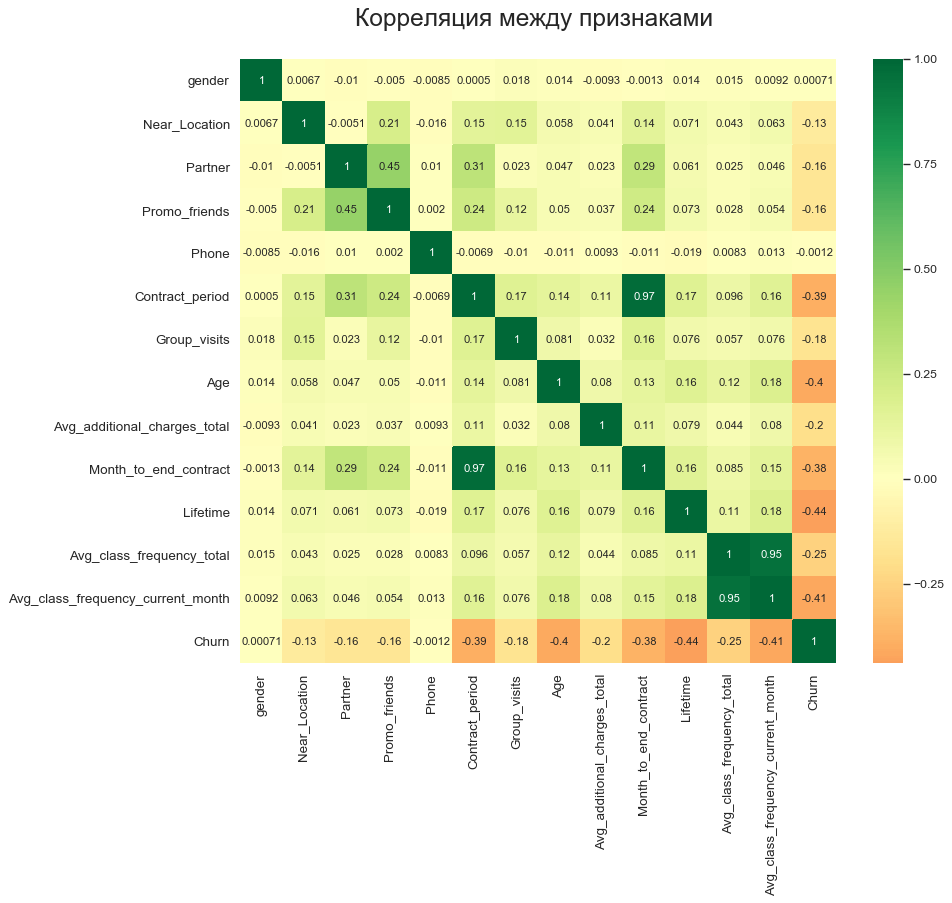

In [11]:
plt.figure(figsize=(12,10), dpi= 80)
heat = sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция между признаками \n', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

bottom, top = heat.get_ylim()
heat.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


In [12]:
#Корреляция
print(df.corr().unstack().sort_values().loc['Churn'])

Lifetime                            -0.438220
Avg_class_frequency_current_month   -0.412348
Age                                 -0.404735
Contract_period                     -0.389984
Month_to_end_contract               -0.381393
Avg_class_frequency_total           -0.249715
Avg_additional_charges_total        -0.198697
Group_visits                        -0.175325
Promo_friends                       -0.162233
Partner                             -0.157986
Near_Location                       -0.128098
Phone                               -0.001177
gender                               0.000708
Churn                                1.000000
dtype: float64


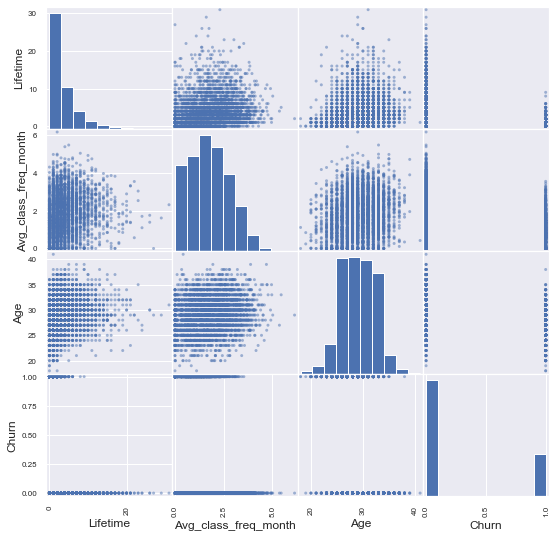

In [13]:
# Наибольшее влияние - корреляция выше 40%
df_stat = df[['Lifetime', 'Avg_class_frequency_current_month', 'Age', 'Churn']]
df_stat.columns = ['Lifetime', 'Avg_class_freq_month', 'Age', 'Churn']
pd.plotting.scatter_matrix(df_stat, grid=30, figsize=(9,9))
plt.show()

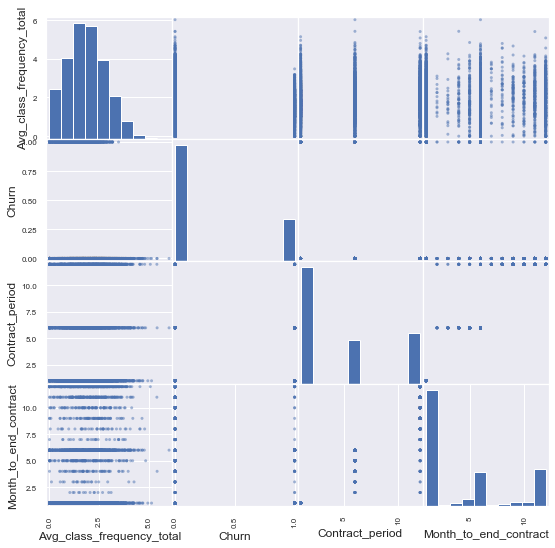

In [14]:
# Корреляция 24%-39%
df_stat = df.pivot_table(index=df.index, values=['Contract_period', 'Month_to_end_contract', 
                                                 'Avg_class_frequency_total', 'Churn'], aggfunc='mean')
pd.plotting.scatter_matrix(df_stat, grid=30, figsize=(9,9))
plt.show()

Наибольшее влияние оказывают показатели:
Lifetime (44%), Avg_class_frequency_current_month (41%), Age (40%), Contract_period (39%), Month_to_end_contract (38%), Avg_class_frequency_total (25%).
Phone и gender не оказывают влияния.                             

## Построим модель прогнозирования оттока пользователей
Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
Обучите модель на train-выборке двумя способами:
логистической регрессией
случайным лесом
Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [15]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [16]:
# Разделение на обучающую, валидационную и тестовую выборки
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=1)
print('df_train', df_train.shape[0])
print('df_valid', df_valid.shape[0])
print('df_test', df_test.shape[0])

df_train 2400
df_valid 800
df_test 800


In [17]:
# Для полной df
features = df.drop(['Churn'], axis=1)
target = df['Churn']

# Для обучающей выборки
features_train = df_train.drop(['Churn'], axis=1)
target_train = df_train['Churn']

# Для валидационной выборки
features_valid = df_valid.drop(['Churn'], axis=1)
target_valid = df_valid['Churn']

# Для тестовой выборки
features_test = df_test.drop(['Churn'], axis=1)
target_test = df_test['Churn']


In [18]:
# Логистическая регрессия
model_LP = LogisticRegression(random_state=0)
model_LP.fit(features_train, target_train)
# Предсказываем на валидационной выборке
predictions_LR = model_LP.predict(features_valid)

# Проверка модели
# Точность
precision = precision_score(target_valid, predictions_LR) 
# Полнота
recall = recall_score(target_valid, predictions_LR)

F_score = 2 * recall * precision / (recall + precision)
print('Проверка модели - логистическая регрессия')
print('F_score =', F_score)
print()

Проверка модели - логистическая регрессия
F_score = 0.8686868686868687



/Users/Alexander/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# Cлучайный лес
model_Forest = RandomForestClassifier(random_state=1, max_depth=5) # n_estimators=estim
model_Forest.fit(features_train, target_train)

/Users/Alexander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [20]:
data = pd.DataFrame({'max_depth':[], 'n_estimators':[], 'F_score':[]})
n=0
for i in range(3, 10):
    for j in range (3, 10):
        model_Forest = RandomForestClassifier(n_estimators=j, random_state=1, max_depth=i)
        model_Forest.fit(features_train, target_train) 
        predictions_Forest = model_Forest.predict(features_valid)
        
        # Проверка модели
        recall_F = recall_score(target_valid, predictions_Forest)
        # Точность
        precision_F = precision_score(target_valid, predictions_Forest) 
    
        F_score = 2 * recall_F * precision_F / (recall_F + precision_F)
        
        data.loc[n] = (i, j, F_score)
        n+=1

In [21]:
data.head()

,max_depth,n_estimators,F_score
0,3.0,3.0,0.789346
1,3.0,4.0,0.760494
2,3.0,5.0,0.770833
3,3.0,6.0,0.761394
4,3.0,7.0,0.796791


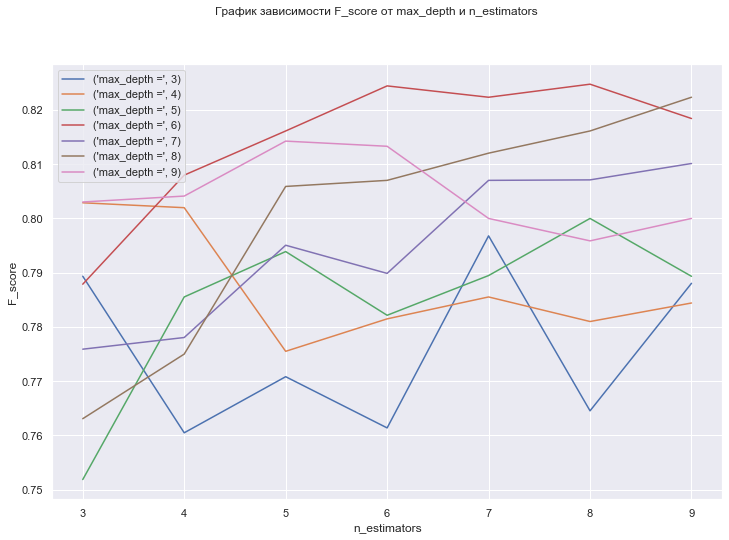

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
legend1=[]
for i in range(int(data['max_depth'].min()), int(data['max_depth'].max())+1):
    plt.plot(data[data['max_depth']==i]['n_estimators'], data[data['max_depth']==i]['F_score'], label=('max_depth =', i))

ax.legend()
plt.xlabel('n_estimators')
plt.ylabel('F_score')
fig.suptitle('График зависимости F_score от max_depth и n_estimators')
plt.show()

In [23]:
model_Forest = RandomForestClassifier(random_state=1,n_estimators= 6, max_depth=6)
model_Forest.fit(features_train, target_train) 
predictions_Forest = model_Forest.predict(features_valid)

# Проверка модели
# Точность
precision_F = precision_score(target_valid, predictions_Forest) 
# Полнота
recall_F = recall_score(target_valid, predictions_Forest)

F_score_F = 2 * recall_F * precision_F / (recall_F + precision_F)

print('Проверка модели - случайный лес')
print('F_score =', F_score_F)
print()

Проверка модели - случайный лес
F_score = 0.8244274809160305



In [24]:
# Логистическая регрессия
# Предсказываем на валидационной выборке
predictions_LR_test = model_LP.predict(features_test)

# Проверка модели
# Точность
precision_test = precision_score(target_test, predictions_LR_test) 
# Полнота
recall_test = recall_score(target_test, predictions_LR_test)

F_score_test = 2 * recall_test * precision_test / (recall_test + precision_test)
print('Проверка модели - логистическая регрессия')
print('F_score_test =', F_score)
print()


predictions_Forest_test = model_Forest.predict(features_test)

# Проверка модели
# Точность
precision_F_test = precision_score(target_test, predictions_Forest_test) 
# Полнота
recall_F_test = recall_score(target_test, predictions_Forest_test)

F_score_F_test = 2 * recall_F_test * precision_F_test / (recall_F_test + precision_F_test)

print('Проверка модели - случайный лес')
print('F_score_F_test =', F_score_F_test)
print()

Проверка модели - логистическая регрессия
F_score_test = 0.8

Проверка модели - случайный лес
F_score_F_test = 0.8246445497630331



## Проверка моделей показала, что у случайного леса выше f-score. Выбираю эту модель.

## Кластеризация пользователей

In [25]:
# features = df - Churn
sc = StandardScaler()
x_sc = sc.fit_transform(features) # Матрица расстояний

In [26]:
# Вариант для кластеризации выбрки (ускорить процесс, разные варианты в зависимости от выборки)
features_mini = df.loc[0:2, :]
for ind in range(8, 4000, 50):
    features_mini.loc[ind, :] = df.loc[ind, :]
features_mini.shape[0]
x_sc_mini = sc.fit_transform(features)

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
linked = linkage(x_sc, method = 'ward')

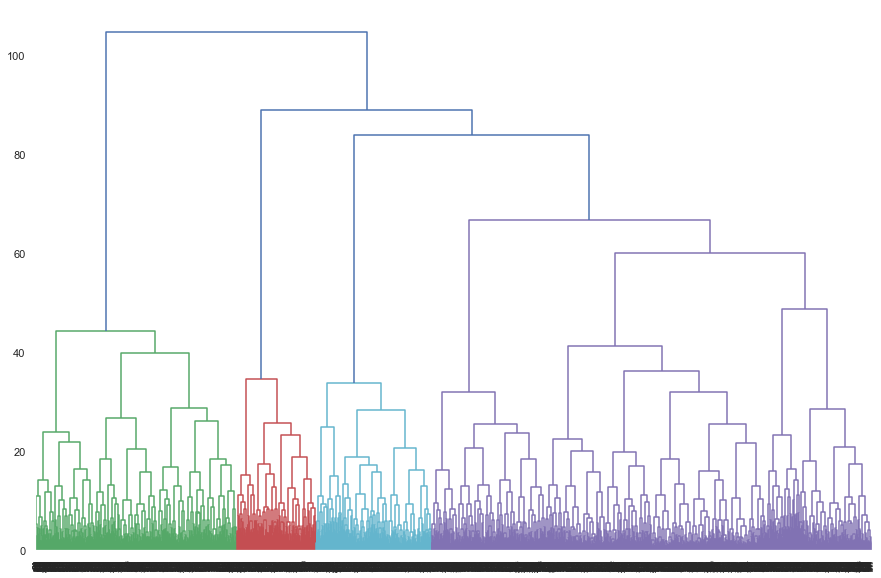

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top');

linkage рекомендует разбить объекты на 2-3-4 кластера

In [29]:
# задаём модель k_means с числом кластеров 3
k_means = KMeans(n_clusters = 3, random_state=12)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = k_means.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
features['clusters'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
features_clusters_mean = features.groupby(['clusters']).mean()
features_clusters_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
clusters,,,,,,,,,,,,,
0,0.486027,0.758202,0.379708,0.185298,0.907655,1.879708,0.289186,28.069866,128.272924,1.789793,2.241191,1.223044,0.965879
1,0.508787,0.939749,0.774895,0.566527,0.897908,10.704603,0.540586,29.895397,162.014803,9.791632,4.682845,1.963111,1.953174
2,0.546160,0.871441,0.341674,0.217429,0.903365,2.449525,0.454702,30.033650,157.920611,2.281277,4.843831,2.723926,2.712966


Гуппа 0 очевидно включает более склонных к оттоку клиентов.

In [30]:
# Средние значения для групп оттока и life
group_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [31]:
features.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,clusters
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [32]:
clusters_Series = features['clusters']

In [33]:
df = df.merge(clusters_Series, on=df.index, how='left')

In [34]:
df.head()

,key_0,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,clusters
0,0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


In [35]:
df_clusters_mean = df.groupby('clusters').mean().round(2).reset_index()
df_clusters_mean

,clusters,key_0,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,1993.72,0.49,0.76,0.38,0.19,0.91,1.88,0.29,28.07,128.27,1.79,2.24,1.22,0.97,0.56
1,1,2017.31,0.51,0.94,0.77,0.57,0.90,10.70,0.54,29.90,162.01,9.79,4.68,1.96,1.95,0.03
2,2,1989.34,0.55,0.87,0.34,0.22,0.90,2.45,0.45,30.03,157.92,2.28,4.84,2.72,2.71,0.09


Есть отличия в средних значениях кластеров.
- 0
 - 38% являются сотрудником компании-партнера
 - 19% участвуют в акции 'Promo_friends'
 - Contract_period в среднем 1.9 месяцев
 - 29% посещают групповые занятия
 - Продолжительность посещения в среднем 2.24
 - Среднее количество посещений в неделю за месяц 1
 
- 1
 - 77% являются сотрудником компании-партнера
 - 57% участвуют в акции 'Promo_friends'
 - Contract_period в среднем 10.7 месяцев
 - 54% посещают групповые занятия
 - Продолжительность посещения в среднем 4.68
 - Среднее количество посещений в неделю за месяц 2
 
- 2
 - 34% являются сотрудником компании-партнера
 - 22% участвуют в акции 'Promo_friends'
 - Contract_period в среднем 2.45 месяцев
 - 45% посещают групповые занятия
 - Продолжительность посещения в среднем 4.8
 - Среднее количество посещений в неделю за месяц 2.7 

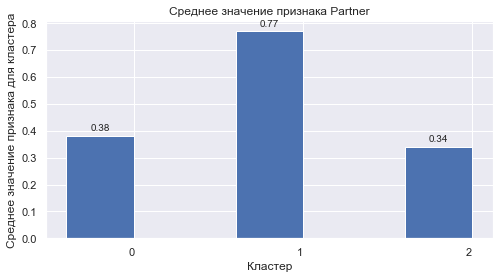

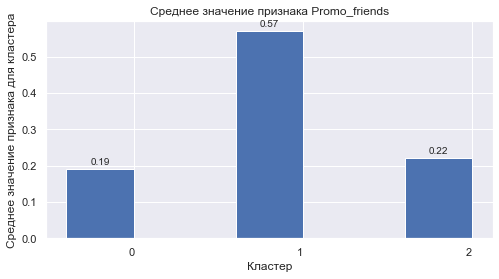

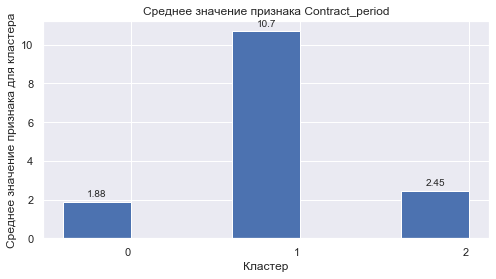

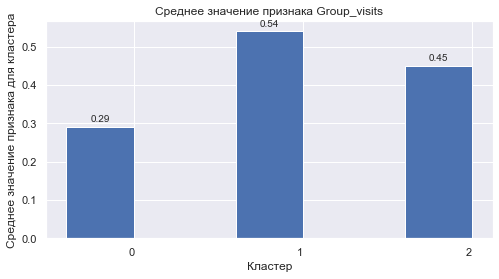

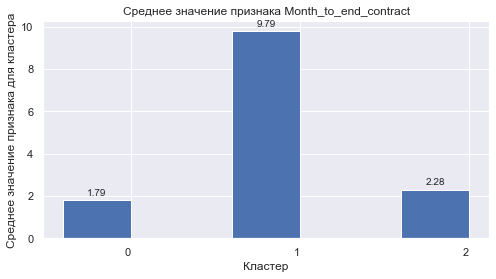

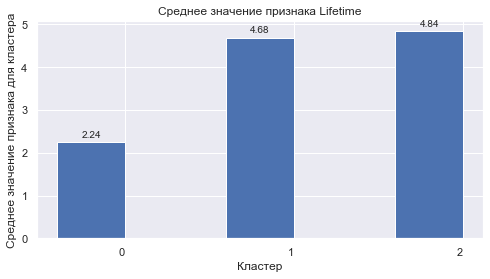

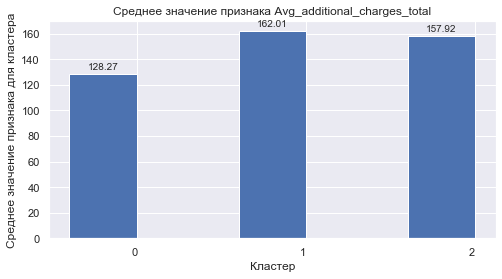

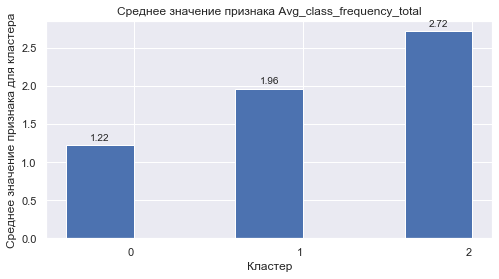

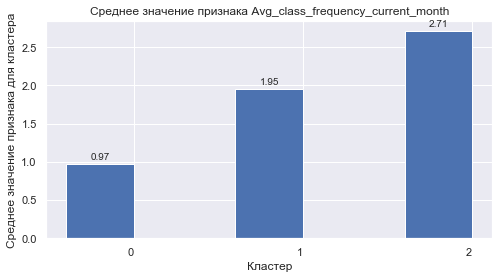

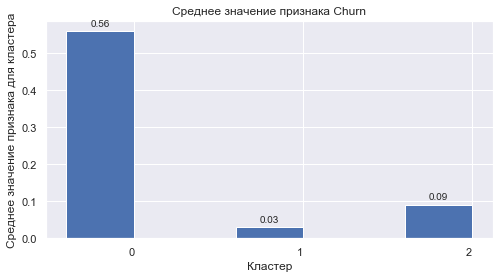

In [36]:
# Сравнение кластеров
for col in ['Partner', 'Promo_friends', 'Contract_period', 'Group_visits', 'Month_to_end_contract', 
            'Lifetime', 'Avg_additional_charges_total', 'Avg_class_frequency_total',
            'Avg_class_frequency_current_month', 'Churn']:   
    f, ax = plt.subplots(figsize=(8,4))
    names = df_clusters_mean['clusters']

    x = np.arange(len(names)) 
    width=0.4
    
    p1=plt.bar(x - width/2, df_clusters_mean[col], width, alpha=1)
    
    # Подписи данных
    def autolabel(rects, xpos='center'):
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')
 
    
    autolabel(p1, "center")

    plt.xticks([r for r in range(len(df_clusters_mean['clusters']))], names, horizontalalignment='right', rotation=0)
    plt.xlabel('Кластер')
    plt.ylabel('Среднее значение признака для кластера')
    plt.title('Среднее значение признака ' + col)
    
    plt.show()
    print()

In [37]:
df_0 = df[df['clusters']==0]
df_1 = df[df['clusters']==1]
df_2 = df[df['clusters']==2]

Изучила я 4 группы клиентов. Получила результат:

В группе 0, 52% клиентов могут уйти в первый месяц действия абонемента. По другим признакам стабильная группа.
В группе 1 доля оттока очень высока (52%). Клиенты с абонементом, срок действия которого менее 6 месяцев могут уйти в отток. Также доля оттока высока (49% - 90%) первые три месяца действия абонемента.
В группе 2 доля оттока высока (30%) в первый месяц действия абонемента. Остальные признакистабильно хороши. Можно объединить с группой 0.
Группа 3 имеет высокую долю оттока по многим признакам.

Лучше просто изменить в столбце clusters значение 2 на 0? При таком подходе есть ощущение контроля над ситуацией.
Или перезапустить k_means с количеством кластеров 3? При таком подходе можно довериться формулам, они лучше поделят на кластеры?

Группа 0 имеет высокую долю оттока по многим признакам.
### Характеристики кластера:
- Клиенты покупают абонемент на 1 месяц.
- 24 - 32 года.
- В последний месяц действия абонемента 62% клиентов уходит в отток.
- В первый месяц уходят в отток 93%, во второй, третий, четвертый месяц доля оттока очень высока (72%, 53%, 28%).
- Клиенты в среднем посещают клуб 1 раз в неделю.

В группе 1 доля оттока высока (30%) в первый месяц действия абонемента. Остальные признакистабильно хороши.
### Характеристики кластера:
- Клиент живет/работает рядом с клубом.
- Обычно является сотрудником компании-партнёра клуба.
- Покупает абонемент на 12 или на 6 месяцев.
- 27 - 33 года.
- В первый месяц действия абонемента 30% клиентов оттекают.
- Клиенты в среднем посещают клуб 2 раза в неделю.

В группе 2 доля оттока высока (54% и 26%) первые 2 месяца действия абонемента. Остальные показатели стабильно хороши.
### Характеристики кластера:
- Клиент живет/работает рядом с клубом.
- Обычно не является сотрудником компании-партнёра клуба.
- Обычно не учавствовал в акции "приведи друга".
- Обычно покупает абонемент на 1 месяц.
- Покупает абонемент на 12 или на 6 месяцев.
- 27 - 33 года.
- В первый месяц действия абонемента 54% клиентов оттекают, во второй месяц - 26%.
- Клиенты в среднем посещают клуб 2,7 раз в неделю.

In [38]:
df_clusters = df.groupby('clusters').agg({'Churn':['sum','count']}).reset_index()
df_clusters.columns=['clusters','Churn', 'all']
df_clusters['life'] = df_clusters['all'] - df_clusters['Churn']
df_clusters['dolja_Churn'] = (df_clusters['Churn'] / df_clusters['all']).round(2)
df_clusters['dolja_life'] = (df_clusters['life'] / df_clusters['all']).round(2)
df_clusters

,clusters,Churn,all,life,dolja_Churn,dolja_life
0,0,924,1646,722,0.56,0.44
1,1,36,1195,1159,0.03,0.97
2,2,101,1159,1058,0.09,0.91


56% клиентов кластера 0 оттекли. 1 и 2 стабильны.

<div style="border:solid purple 2px; padding: 20px">

<h1 style="color:purple; margin-bottom:20px">Основные задачи клуба для уменьшения оттока:</h1>


- Удержать первые 3 месяца (для группы 0), или хотя бы 1 месяц (для групп 1 и 2).
- Создать условия для 2-3 посещений в неделю клиентом.

Остальные пункты для группы 0
- Стараться продавать абонемент на 6 мес или на 12. (Отток клиентов с абонементом на месяц для группы 0 - 62%).
- Приглашать на групповые занятия.
- В последний месяц действия абонемента делать предложение о продлении.
</div>